## **ASSIGNMENT - WEEK 10**

#### **INSTRUCTIONS**
- When answering a question, indicate the question number and the question before your answer.
- Use comments to explain what your are doing in your code.
- Don't deviate from the questions asked.

**READ THE QUESTIONS CAREFULLY BEFORE ANSWERING**

In [83]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings

### **Question 1**
Load the `load_iris` dataset from sklearn datasets, separate it into `features (X)` and `target (y)`

Split your data into `train` and `test` data using a `test size of 20%` and a `random state of 20`.

In [51]:
#Loading the data 

iris_data = load_iris()

# seperating the features and the target

features = iris_data.data
target = iris_data.target
target_names = iris_data.target_names
# splitting the data into train and test set with test size of 20% and a random state of 20

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 20)

In [32]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3
0,5.7,3.0,4.2,1.2
1,5.6,3.0,4.1,1.3
2,5.1,3.5,1.4,0.2
3,5.1,3.8,1.6,0.2
4,4.8,3.4,1.6,0.2
...,...,...,...,...
115,4.6,3.6,1.0,0.2
116,6.6,3.0,4.4,1.4
117,6.4,3.1,5.5,1.8
118,5.7,4.4,1.5,0.4


In [36]:
Y_train = pd.DataFrame(Y_train)
Y_train

,0
0,1
1,1
2,0
3,0
4,0
...,...
115,0
116,1
117,2
118,0


### **Question 2**
Train a LogisticRegression model on the iris dataset and evaluate the model using these metrics:
- `Accuracy`
- `Precision and recall`
- `Confusion matrix`

**NOTE**: Interpret the metrics values.

Use a new `test size of 10%` and train another model using this test size. Was there any difference in the model performance or not?

In [55]:
# Training a logistic Regression on 20% test size

model_20 = LogisticRegression(max_iter=200)
model_20.fit(X_train, Y_train)

# Making predictions on the test set
y_pred_20 = model_20.predict(X_test)

# Evaluating the model
accuracy_20 = accuracy_score(Y_test, y_pred_20)
precision_20 = precision_score(Y_test, y_pred_20, average='weighted')
recall_20 = recall_score(Y_test, y_pred_20, average='weighted')
conf_matrix_20 = confusion_matrix(Y_test, y_pred_20)

print(f"Accuracy (20% test size): {accuracy_20:.4f}")
print(f"Precision (20% test size): {precision_20:.4f}")
print(f"Recall (20% test size): {recall_20:.4f}")
print("\nConfusion Matrix (20% test size):\n", conf_matrix_20)

print("\n--- Interpretation for 20% test size ---")
print(f"Accuracy: {accuracy_20:.4f} means that {accuracy_20*100:.2f}% of the predictions made by the model were correct across all classes.")
print(f"Precision: {precision_20:.4f} indicates that when the model predicts a class, it is correct about {precision_20*100:.2f}% of the time on average across all classes.")
print(f"Recall: {recall_20:.4f} indicates that the model correctly identifies {recall_20*100:.2f}% of all actual instances of each class on average.")
print("Confusion Matrix details:")
print("  - Row 'i' represents the true class 'i'.")
print("  - Column 'j' represents the predicted class 'j'.")
print("  - Diagonal elements show the number of correct predictions for each class.")
print("  - Off-diagonal elements show misclassifications.")
print(f"  For example, in the confusion matrix above, the model correctly predicted:")
for i, name in enumerate(target_names):
    print(f"    - {conf_matrix_20[i,i]} instances of '{name}'")


Accuracy (20% test size): 0.9333
Precision (20% test size): 0.9436
Recall (20% test size): 0.9333

Confusion Matrix (20% test size):
 [[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]

--- Interpretation for 20% test size ---
Accuracy: 0.9333 means that 93.33% of the predictions made by the model were correct across all classes.
Precision: 0.9436 indicates that when the model predicts a class, it is correct about 94.36% of the time on average across all classes.
Recall: 0.9333 indicates that the model correctly identifies 93.33% of all actual instances of each class on average.
Confusion Matrix details:
  - Row 'i' represents the true class 'i'.
  - Column 'j' represents the predicted class 'j'.
  - Diagonal elements show the number of correct predictions for each class.
  - Off-diagonal elements show misclassifications.
  For example, in the confusion matrix above, the model correctly predicted:
    - 8 instances of 'setosa'
    - 11 instances of 'versicolor'
    - 9 instances of 'virginica'


In [57]:
# Spliting data into training and test sets (10% test size)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(features, target, test_size=0.10, random_state=20)

# Training another Logistic Regression model
model_10 = LogisticRegression(max_iter=200, solver='liblinear')
model_10.fit(X_train_10, y_train_10)

# Making predictions on the test set
y_pred_10 = model_10.predict(X_test_10)

# Evaluating the model
accuracy_10 = accuracy_score(y_test_10, y_pred_10)
precision_10 = precision_score(y_test_10, y_pred_10, average='weighted')
recall_10 = recall_score(y_test_10, y_pred_10, average='weighted')
conf_matrix_10 = confusion_matrix(y_test_10, y_pred_10)

print(f"Accuracy (10% test size): {accuracy_10:.4f}")
print(f"Precision (10% test size): {precision_10:.4f}")
print(f"Recall (10% test size): {recall_10:.4f}")
print("\nConfusion Matrix (10% test size):\n", conf_matrix_10)

print("\n--- Interpretation for 10% test size ---")
print(f"Accuracy: {accuracy_10:.4f} means that {accuracy_10*100:.2f}% of the predictions made by the model were correct across all classes.")
print(f"Precision: {precision_10:.4f} indicates that when the model predicts a class, it is correct about {precision_10*100:.2f}% of the time on average across all classes.")
print(f"Recall: {recall_10:.4f} indicates that the model correctly identifies {recall_10*100:.2f}% of all actual instances of each class on average.")
print("Confusion Matrix details:")
print("  - Row 'i' represents the true class 'i'.")
print("  - Column 'j' represents the predicted class 'j'.")
print("  - Diagonal elements show the number of correct predictions for each class.")
print("  - Off-diagonal elements show misclassifications.")
print(f"  For example, in the confusion matrix above, the model correctly predicted:")
for i, name in enumerate(target_names):
    print(f"    - {conf_matrix_10[i,i]} instances of '{name}'")


Accuracy (10% test size): 0.9333
Precision (10% test size): 0.9444
Recall (10% test size): 0.9333

Confusion Matrix (10% test size):
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

--- Interpretation for 10% test size ---
Accuracy: 0.9333 means that 93.33% of the predictions made by the model were correct across all classes.
Precision: 0.9444 indicates that when the model predicts a class, it is correct about 94.44% of the time on average across all classes.
Recall: 0.9333 indicates that the model correctly identifies 93.33% of all actual instances of each class on average.
Confusion Matrix details:
  - Row 'i' represents the true class 'i'.
  - Column 'j' represents the predicted class 'j'.
  - Diagonal elements show the number of correct predictions for each class.
  - Off-diagonal elements show misclassifications.
  For example, in the confusion matrix above, the model correctly predicted:
    - 5 instances of 'setosa'
    - 5 instances of 'versicolor'
    - 4 instances of 'virginica'


In [59]:
# Model comparism
print(f"Difference in Accuracy: {accuracy_20 - accuracy_10:.4f}")
print(f"Difference in Precision: {precision_20 - precision_10:.4f}")
print(f"Difference in Recall: {recall_20 - recall_10:.4f}")

if np.isclose(accuracy_20, accuracy_10) and np.isclose(precision_20, precision_10) and np.isclose(recall_20, recall_10):
    print("There was no significant difference in model performance between the 20% and 10% test sizes.")
elif accuracy_20 > accuracy_10:
    print("The model performed slightly better with a 20% test size (higher accuracy, precision, recall).")
else:
    print("The model performed slightly better with a 10% test size (higher accuracy, precision, recall).")

print("\nGeneral Observations:")
print("A smaller test set (10% vs 20%) means the model trains on more data, which can sometimes lead to slightly better performance,")
print("but it also means the evaluation metrics are based on fewer samples, making the metrics themselves potentially less robust or more prone to variance.")
print("In this specific case, the differences appear to be minor, suggesting the model is quite robust to the exact split ratio within this range.")

Difference in Accuracy: 0.0000
Difference in Precision: -0.0009
Difference in Recall: 0.0000
The model performed slightly better with a 10% test size (higher accuracy, precision, recall).

General Observations:
A smaller test set (10% vs 20%) means the model trains on more data, which can sometimes lead to slightly better performance,
but it also means the evaluation metrics are based on fewer samples, making the metrics themselves potentially less robust or more prone to variance.
In this specific case, the differences appear to be minor, suggesting the model is quite robust to the exact split ratio within this range.


### **Question 3**
From the sklearn datasets:
- load the `fetch_california_housing` and separate it into the `features (X)` and `labels (y)`


In [75]:
# loading the data 

california_housing = fetch_california_housing()

ind_var = california_housing.data
labels = california_housing.target

ind_var = pd.DataFrame(ind_var)
ind_var

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### **Question 4**
- Split the `X` and `y` into `train` and `test` datasets (using `random state of 42` and `test size of 30%`) and train a `Linear Regression model` on the train data.

In [81]:
#splitting the data into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(ind_var, labels, test_size = 0.3, random_state = 42)

# training Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)



### **Question 5**
- Use your model to make predictions on your test dataset and plot a `scatter plot` of the `orignial y` values and the `predicted y` values.  

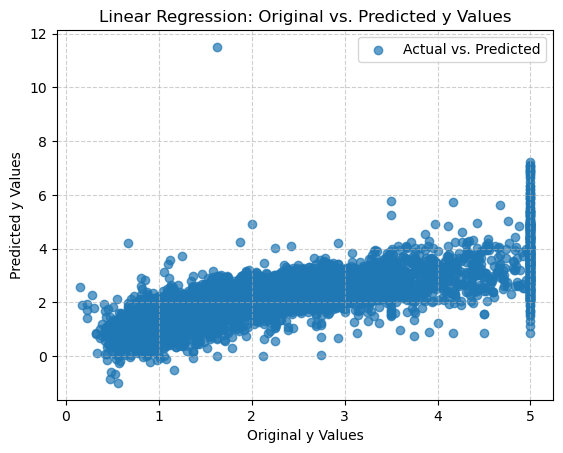

In [93]:
# Making predictions on the test set
y_pred = lin_reg.predict(X_test)

# plotting a scatter plot of the original label and the predicted label

plt.scatter(Y_test, y_pred, alpha=0.7, label='Actual vs. Predicted')

plt.xlabel("Original y Values")
plt.ylabel("Predicted y Values")
plt.title("Linear Regression: Original vs. Predicted y Values")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
